In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# install ONNXRUNTIME module
!pip install ONNXRUNTIME

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 7.7 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 


In [ ]:
# installing a package for show ram profile
!pip install -U memory_profiler

In [67]:
# import necessary packages
import onnxruntime
import numpy as np
import time
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

In [9]:
# creating a session for Inference
def create_session(model_path):
  return onnxruntime.InferenceSession(model_path)
model_path = '/content/drive/MyDrive/Waste trash model/firstONNX.onnx'

ort_session = create_session(model_path)
# a function to convert tensors or other files to numpy files
def to_numpy(tens):
  return tens.detach().cpu().numpy() if tens.requires_grad else tens.cpu().numpy()

In [10]:
image_path = '/content/drive/MyDrive/Waste trash model/Wadaba dataset/Set 18/0086_a01b00c1d0e0f0g1h4.jpg'
def img_prepare(image_path, image_size = [224,224]):  
  img = Image.open(image_path)

  resize = transforms.Resize(image_size)
  img = resize(img)
  to_tensor = transforms.ToTensor()
  img = to_tensor(img)
  img.unsqueeze_(dim =0)
  return img
img = img_prepare(image_path)
img

tensor([[[[0.0980, 0.0980, 0.1020,  ..., 0.0863, 0.0824, 0.0745],
          [0.1020, 0.1020, 0.1020,  ..., 0.0863, 0.0863, 0.0784],
          [0.1020, 0.1020, 0.0980,  ..., 0.0824, 0.0902, 0.0824],
          ...,
          [0.1255, 0.1216, 0.1255,  ..., 0.1373, 0.1373, 0.1333],
          [0.1255, 0.1255, 0.1216,  ..., 0.1373, 0.1373, 0.1373],
          [0.1216, 0.1176, 0.1176,  ..., 0.1333, 0.1333, 0.1333]],

         [[0.0706, 0.0745, 0.0745,  ..., 0.0627, 0.0588, 0.0549],
          [0.0706, 0.0745, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0667, 0.0745, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          ...,
          [0.1020, 0.0980, 0.0980,  ..., 0.0980, 0.0980, 0.0941],
          [0.0980, 0.0941, 0.0941,  ..., 0.0980, 0.0980, 0.0980],
          [0.0980, 0.0941, 0.0941,  ..., 0.0980, 0.0941, 0.0941]],

         [[0.0353, 0.0392, 0.0431,  ..., 0.0353, 0.0314, 0.0353],
          [0.0353, 0.0392, 0.0431,  ..., 0.0353, 0.0353, 0.0353],
          [0.0314, 0.0392, 0.0431,  ..., 0

In [21]:
# class dictionary for plastic types and corresponding labels.
class_dict = {0  : "miss",
1 : "PET",
2 : "PE-HD",
3 : "PVC",
4 : "PE-LD",
5 : "PP",
6 : "PS",
7 : "Other"}

In [43]:
def get_pred(img, ort_session,class_dict):
  ort_inputs = {ort_session.get_inputs()[0].name : to_numpy(img)}
  start_time = time.time()
  ort_outs = ort_session.run(None, ort_inputs)
  time_elapsed = time.time() - start_time
  softmax = nn.Softmax(dim = 2)
  outputs = softmax(torch.tensor(ort_outs))
  _,preds = torch.max(outputs, dim = 2)
  p_type = class_dict[int(preds)]
  return p_type, preds, time_elapsed

prediction: PET 

Input image has given to model, prediction was 1 so plastic type is PET. operation done in 291.96 ms



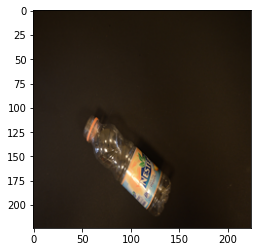

In [69]:
def show_result():
  p_type, pred , elapsed = get_pred(img, ort_session,class_dict)
  print(f'prediction: {p_type} \n\nInput image has given to model, prediction was {int(pred)} so plastic type is {p_type}. operation done in {elapsed*1000:.2f} ms\n')
  Img = Image.open(image_path)
  Img = Img.resize([224,224])
  plt.imshow(Img)
show_result()